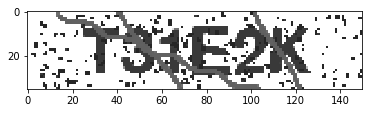

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread("data/vietteltelecom.vn/T31E2K.png")
imgplot = plt.imshow(img)
plt.show()


# Histogram

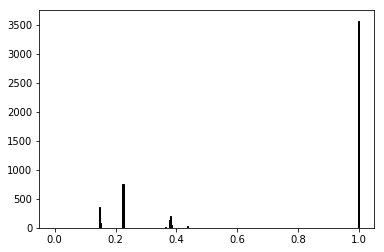

In [11]:
lum_img = img[:,:,0]
plt.hist(lum_img.ravel(), 256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

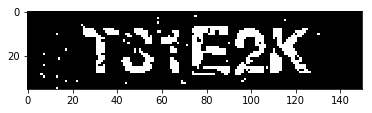

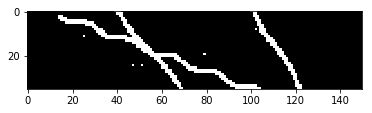

In [12]:
import numpy as np
arr1 = np.copy(lum_img)
arr1[(lum_img < 0.2) | (lum_img > 0.3)] = 0
arr1[(lum_img >= 0.2) & (lum_img <= 0.3)] = 1
output1 = np.copy(arr1)
imgplot = plt.imshow(arr1, cmap='gray')
plt.show()

arr2 = np.copy(lum_img)
arr2[(lum_img < 0.3) | (lum_img > 0.4)] = 0
arr2[(lum_img >= 0.3) & (lum_img < 0.4)] = 1
imgplot = plt.imshow(arr2, cmap='gray')
plt.show()

In [13]:
from scipy import ndimage

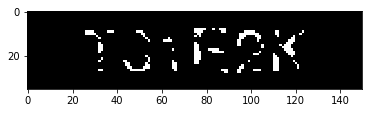

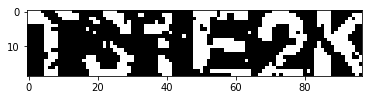

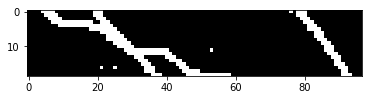

In [14]:
im_fill_hole = ndimage.binary_fill_holes(arr1, structure=np.ones((5,5))).astype(arr1.dtype)

im_med = ndimage.binary_erosion(im_fill_hole).astype(im_fill_hole.dtype)
imgplot = plt.imshow(im_med, cmap='gray')
plt.show()

sum_im_med = np.sum(im_med, axis = 1)
index_y = np.where(sum_im_med > 3)

sum_im_med = np.sum(im_med, axis = 0)
index_x = np.where(sum_im_med > 0)

im_extract = arr1[index_y[0][0]:index_y[0][-1], index_x[0][0]:index_x[0][-1]]

imgplot = plt.imshow(im_extract, cmap='gray')
plt.show()

output1 = np.copy(im_extract)

noise_extract = arr2[index_y[0][0]:index_y[0][-1], index_x[0][0]:index_x[0][-1]]

imgplot = plt.imshow(noise_extract, cmap='gray')
plt.show()


[[15 31 42 43 44 46 47 65 66 82]]
[-1 15 31 42 43 44 46 47 65 66 82 96]
[16 16 11  1  1  2  1 18  1 16 14]
[ 1  2  3  8 10 11]


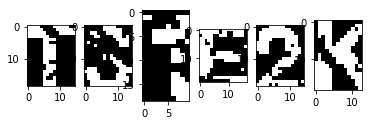

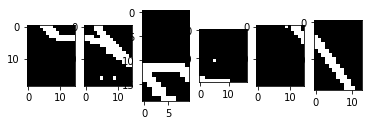

In [15]:
sum_im_med = np.sum(im_extract, axis = 0)

index_sub = np.array(np.where(sum_im_med == 0))
print(index_sub)
# index_sub.shape
index_sub = np.concatenate((np.array([-1]), index_sub[0], np.array([im_extract.shape[1] - 1])), axis=0)
print(index_sub)

tmp = np.diff(index_sub)
print(tmp)

idx = np.array(np.where(tmp > 6)) + 1
idx = idx[0]
print(idx)

number_character = idx.shape[0]

image_subtract = []
for i in idx:
    image_tmp = im_extract[:, index_sub[i - 1] + 1:index_sub[i]]
    image_subtract.append(image_tmp)

for i in range(number_character):
    plt.subplot(1, number_character, i + 1)
    imgplot = plt.imshow(image_subtract[i], cmap='gray')
    
plt.show()

noise_subtract = []
for i in idx:
    image_tmp = noise_extract[:, index_sub[i - 1] + 1:index_sub[i]]
    noise_subtract.append(image_tmp)

for i in range(number_character):
    plt.subplot(1, number_character, i + 1)
    imgplot = plt.imshow(noise_subtract[i], cmap='gray')
    
plt.show()

In [16]:
output1 = np.copy(image_subtract[5])
output2 = np.copy(noise_subtract[5])

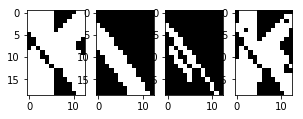

In [21]:

im_dilation = ndimage.binary_dilation(output1).astype(output1.dtype)
plt.subplot(1, 5, 1)
imgplot = plt.imshow(im_dilation, cmap='gray')

plt.subplot(1, 5, 2)
im_dilation2 = ndimage.binary_dilation(output2).astype(output2.dtype)
imgplot = plt.imshow(im_dilation2, cmap='gray')

plt.subplot(1, 5, 3)
im_intersection = (im_dilation == 1) & (im_dilation2 == 1)
imgplot = plt.imshow(im_intersection, cmap='gray')

plt.subplot(1, 5, 4)
im_sum = (im_intersection == 1) | (output1 == 1)
imgplot = plt.imshow(im_sum, cmap='gray')

# plt.subplot(1, 5, 5)
# im_final = ndimage.binary_dilation(im_sum).astype(im_sum.dtype)
# imgplot = plt.imshow(im_final, cmap='gray')

im_final = np.copy(im_sum)

plt.show()

mpimg.imsave("text0.png", 1 - im_final, cmap='gray')

In [26]:
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract

image_gray = Image.open("text0_bolder.png")

text = pytesseract.image_to_string(image_gray, 
                                   config = "-psm 10 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ")

print(text)

K


In [19]:
import tesserocr
from PIL import Image

image = Image.open('text0_bolder.png')

text = tesserocr.image_to_text(image, psm=10)  # print ocr text from image
print(text)

.


